#### Load the Libraries

In [1]:
# Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importing the Train data

In [2]:
train_data=pd.read_csv("Google_Stock_Price_Train.csv")
train_dataset=train_data.iloc[:,1:2].values
train_dataset

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

#### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_data_scaled=sc.fit_transform(train_dataset)

In [4]:
# RNN network works on Time stamps. Creating a data structure with 60 time stamps and 1 output
x_train=[]
y_train=[]
for i in range(60, 1258):
    x_train.append(train_data_scaled[i-60:i, 0])
    y_train.append(train_data_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [5]:
x_train.shape

(1198, 60)

In [6]:
y_train.shape

(1198,)

In [7]:
# Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [8]:
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [9]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [10]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
38/38 [==============================] - 1s 29ms/step - loss: 0.0440
Epoch 2/100
38/38 [==============================] - 1s 24ms/step - loss: 0.0074
Epoch 3/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0062
Epoch 5/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0043
Epoch 6/100
38/38 [==============================] - 1s 26ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0053
Epoch 10/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0039
Epoch 11/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0045
Epoch 13/100
38/38 [=====

38/38 [==============================] - 1s 23ms/step - loss: 0.0014
Epoch 100/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0014


In [11]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [12]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((train_data['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [13]:
X_test = []
for i in range(60, 80):                   # predicting only for 20 records
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

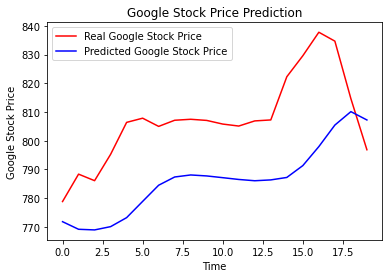

In [14]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()